 # Part(1)
###  Write a Python program that achieve the following goals:
#### 1) Load your dataset 
#### 2) Apply data cleaning based on your dataset needs

    - Remove irrelevant attributes
    - Remove noise
    - Remove correlated attributes 
          . Correlation rate greater than or equal 0.8 for positive correlation
          . Correlation rate less than or equal -0.8 for negative correlation
    - missing handling
    - Remove duplicate records
    
#### 3)  Apply discretization on numeric attributes as possible 
#### you Must add enough comments on your source code to identify and justify each of your data preparing steps. 


___
## Import library 
* import pandas : for  data analysis and associated manipulation of tabular data in Dataframes
* import numpy   : for working with numerical data and  multidimensional array
* import matplotlib : for visualization and figure like boxplot
* import seaborn : for making statistical graphics in Python

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 1) Load your dataset 

In [2]:
# read the dataset by using pandas
data = pd.read_csv(r"C:\Users\free bytes\Downloads\winequalityN5.csv")

### About the data 
* Wine is an alcoholic beverage made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat. It is a pleasant tasting alcoholic beverage, loved cellebrated . It will definitely be interesting to analyze the physicochemical attributes of wine and understand their relationships and significance with wine quality and types classifications. To do this, We will proceed according to the standard Machine Learning and data mining workflow models like the CRISP-DM model, mainly for:

* Predict if each wine sample is a red or white wine.
* Predict the quality of each wine sample, which can be low, medium, or high.
##### Important Attribute Information

<ol>
<li>fixed acidity</li>
<li>volatile acidity</li>
<li>citric acid</li>
<li>residual sugar</li>
<li>chlorides</li>
<li>free sulfur dioxide</li>
<li>total sulfur dioxide</li>
<li>density</li>
<li>pH</li>
<li>sulphates</li>
<li>alcohol</li>
</ol>

Output variable (based on sensory data):
12 - quality (score between 0 and 10)<or>


##### Explore the Data 

In [3]:
# use describe function to get a descriptive statistics summary of data
data.describe()

,Unnamed: 0,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,CpH-103,...,CpH-102,sulphates,alcohol,quality,pH_bup,sulphates_bup,alcohol_bup,quality_re,quality_re.1,Quantity
count,6497.000000,6487.000000,6.497000e+03,6.497000e+03,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,...,6491.000000,6493.000000,6497.000000,6497.000000,6488.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.216579,3.392727e+05,3.185747e+05,5.444326,0.056042,30.525319,115.744574,0.994697,3.217367,...,3.219717,0.531215,10.491801,5.818378,9.455092,11.230409,13.007380,14.784350,15.784350,9659.296875
std,1875.666681,1.296750,1.649783e+05,1.453926e+05,4.758125,0.035036,17.749400,56.521855,0.002999,0.161338,...,0.154537,0.148814,1.192712,0.873255,1.254471,1.584726,1.916722,2.249856,2.249856,27852.934593
min,0.000000,3.800000,0.000000e+00,0.000000e+00,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,...,2.720000,0.220000,8.000000,3.000000,5.290000,5.920000,6.550000,7.180000,8.180000,545.000000
25%,1624.000000,6.400000,2.300000e+05,2.500000e+05,1.800000,0.038000,17.000000,77.000000,0.992340,3.100000,...,3.120000,0.430000,9.500000,5.000000,8.355000,9.826000,11.300333,12.773000,13.773000,4514.000000
50%,3248.000000,7.000000,2.900000e+05,3.100000e+05,3.000000,0.047000,29.000000,118.000000,0.994890,3.200000,...,3.220000,0.510000,10.300000,6.000000,9.340000,11.096000,12.853000,14.605000,15.605000,4514.000000
75%,4872.000000,7.700000,4.000000e+05,3.900000e+05,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,...,3.310000,0.600000,11.300000,6.000000,10.290000,12.268000,14.246000,16.245000,17.245000,4514.000000
max,6496.000000,15.900000,1.580000e+06,1.660000e+06,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,...,4.010000,2.000000,14.900000,9.000000,13.765000,16.702000,19.639000,22.576000,23.576000,288175.800000


In [4]:
# all columns in the data 
data.columns

Index(['Unnamed: 0', 'type', 'fixed acidity', 'volatile acidity_big',
       'citric acid_big', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'CpH-103', 'CpH-101', 'CpH-102',
       'sulphates', 'alcohol', 'quality', 'pH_bup', 'sulphates_bup',
       'alcohol_bup', 'quality_re', 'type_2', 'type_of_coluor', 'quality_re.1',
       'type_dubl', 'type_of_coluor.1', 'the_state_manufacturing ', 'city',
       'manfacutuered_name ', 'Quantity'],
      dtype='object')

In [5]:
#The info() method prints information about the DataFrame.
#The information contains the number of columns, column labels,
#column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                6497 non-null   int64  
 1   type                      6497 non-null   object 
 2   fixed acidity             6487 non-null   float64
 3   volatile acidity_big      6497 non-null   int64  
 4   citric acid_big           6497 non-null   int64  
 5   residual sugar            6495 non-null   float64
 6   chlorides                 6495 non-null   float64
 7   free sulfur dioxide       6497 non-null   float64
 8   total sulfur dioxide      6497 non-null   float64
 9   density                   6497 non-null   float64
 10  CpH-103                   6488 non-null   float64
 11  CpH-101                   6488 non-null   float64
 12  CpH-102                   6491 non-null   float64
 13  sulphates                 6493 non-null   float64
 14  alcohol 

In [6]:
# we display the first 5 rows of the data
data.head()

,Unnamed: 0,type,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,...,quality_re,type_2,type_of_coluor,quality_re.1,type_dubl,type_of_coluor.1,the_state_manufacturing,city,manfacutuered_name,Quantity
0,0,white,7.0,270000,360000,20.7,0.045,45.0,170.0,1.0010,...,14.105,greeen,greeen,15.105,greeen,greeen,Argentina,Buenos Aires,�CONSTELLATION BRANDS,10000.0
1,1,white,6.3,300000,340000,1.6,0.049,14.0,132.0,0.9940,...,14.233,yellow,yellow,15.233,yellow,yellow,France,paris,�THE WINE GROUP,10000.0
2,2,white,8.1,280000,400000,6.9,0.050,30.0,97.0,0.9951,...,14.784,brown,brown,15.784,brown,brown,Argentina,Buenos Aires,�E & J GALLO,10000.0
3,3,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,...,14.734,red,red,15.734,white,red,England,mancity,�E & J GALLO,10000.0
4,4,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,...,14.734,black,black,15.734,white,black,USA,"Washington, D.C.",�E & J GALLO,10000.0


In [7]:
data.describe()

,Unnamed: 0,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,CpH-103,...,CpH-102,sulphates,alcohol,quality,pH_bup,sulphates_bup,alcohol_bup,quality_re,quality_re.1,Quantity
count,6497.000000,6487.000000,6.497000e+03,6.497000e+03,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,...,6491.000000,6493.000000,6497.000000,6497.000000,6488.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.216579,3.392727e+05,3.185747e+05,5.444326,0.056042,30.525319,115.744574,0.994697,3.217367,...,3.219717,0.531215,10.491801,5.818378,9.455092,11.230409,13.007380,14.784350,15.784350,9659.296875
std,1875.666681,1.296750,1.649783e+05,1.453926e+05,4.758125,0.035036,17.749400,56.521855,0.002999,0.161338,...,0.154537,0.148814,1.192712,0.873255,1.254471,1.584726,1.916722,2.249856,2.249856,27852.934593
min,0.000000,3.800000,0.000000e+00,0.000000e+00,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,...,2.720000,0.220000,8.000000,3.000000,5.290000,5.920000,6.550000,7.180000,8.180000,545.000000
25%,1624.000000,6.400000,2.300000e+05,2.500000e+05,1.800000,0.038000,17.000000,77.000000,0.992340,3.100000,...,3.120000,0.430000,9.500000,5.000000,8.355000,9.826000,11.300333,12.773000,13.773000,4514.000000
50%,3248.000000,7.000000,2.900000e+05,3.100000e+05,3.000000,0.047000,29.000000,118.000000,0.994890,3.200000,...,3.220000,0.510000,10.300000,6.000000,9.340000,11.096000,12.853000,14.605000,15.605000,4514.000000
75%,4872.000000,7.700000,4.000000e+05,3.900000e+05,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,...,3.310000,0.600000,11.300000,6.000000,10.290000,12.268000,14.246000,16.245000,17.245000,4514.000000
max,6496.000000,15.900000,1.580000e+06,1.660000e+06,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,...,4.010000,2.000000,14.900000,9.000000,13.765000,16.702000,19.639000,22.576000,23.576000,288175.800000


- df.quality_label = pd.Categorical(wines.quality_label, categories=['low', 'medium', 'high'], ordered=True)
##### we will need this in the decision tree 


In [8]:
data.head()

,Unnamed: 0,type,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,...,quality_re,type_2,type_of_coluor,quality_re.1,type_dubl,type_of_coluor.1,the_state_manufacturing,city,manfacutuered_name,Quantity
0,0,white,7.0,270000,360000,20.7,0.045,45.0,170.0,1.0010,...,14.105,greeen,greeen,15.105,greeen,greeen,Argentina,Buenos Aires,�CONSTELLATION BRANDS,10000.0
1,1,white,6.3,300000,340000,1.6,0.049,14.0,132.0,0.9940,...,14.233,yellow,yellow,15.233,yellow,yellow,France,paris,�THE WINE GROUP,10000.0
2,2,white,8.1,280000,400000,6.9,0.050,30.0,97.0,0.9951,...,14.784,brown,brown,15.784,brown,brown,Argentina,Buenos Aires,�E & J GALLO,10000.0
3,3,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,...,14.734,red,red,15.734,white,red,England,mancity,�E & J GALLO,10000.0
4,4,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,...,14.734,black,black,15.734,white,black,USA,"Washington, D.C.",�E & J GALLO,10000.0


___
### 2) Apply data cleaning based on your dataset needs

___
##### Remove irrelevant attributes
- we interested to analyze the physicochemical attributes of wine and understand their relationships and significance with wine quality and types classifications. 
---
* so we don't need manfacutuered_name & city & the_state_manufacturing & type_of_coluor.1 & type_dubl & quality_re.1 & type_of_coluor & Quantity & pH_bup & sulphates_bup & type_2  

In [9]:
#removing irrevelant columns
data.drop(columns = [ 'the_state_manufacturing ','manfacutuered_name ','city','type_of_coluor.1'
                     ,'type_dubl','quality_re.1','type_of_coluor','Quantity','pH_bup','sulphates_bup'
                     ,'alcohol_bup','quality_re','type_2'],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity_big  6497 non-null   int64  
 4   citric acid_big       6497 non-null   int64  
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  CpH-103               6488 non-null   float64
 11  CpH-101               6488 non-null   float64
 12  CpH-102               6491 non-null   float64
 13  sulphates             6493 non-null   float64
 14  alcohol               6497 non-null   float64
 15  quality              

---
### Remove noise Data 
___
* we interested in the white and red wine only 

In [11]:
#determine unique values in type class
print(data['type'].unique())  

['white' 'black ' 'grey' 'purple' 'red']


In [12]:
# Removing all type that are not white or red
filt = (data['type'] == 'red') | ( data['type'] == 'white')
data= data[filt]


In [13]:
print(data['type'].unique())

['white' 'red']


___
### Remove correlated attributes >0.8


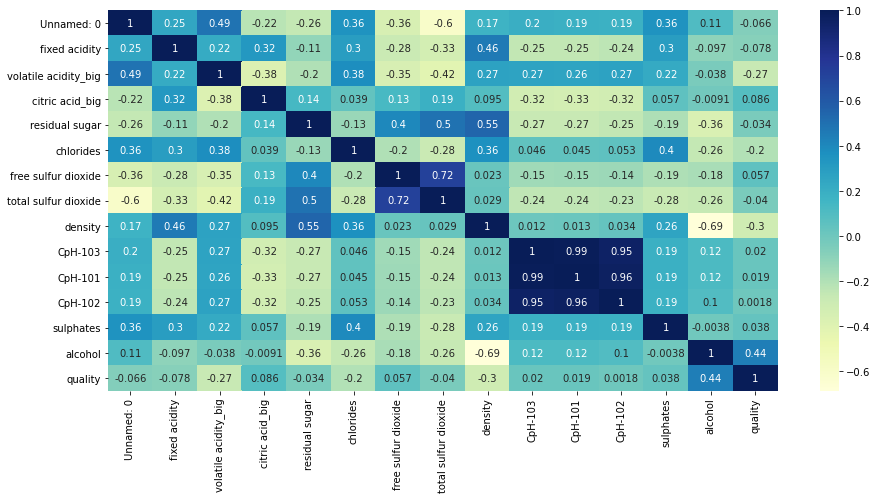

In [14]:
#computing the correlation for data columns

plt.figure(figsize=(15,7))
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu" , annot = True)
plt.show()

In [15]:
data = data.drop(['CpH-103','CpH-102'] , axis = 1 )

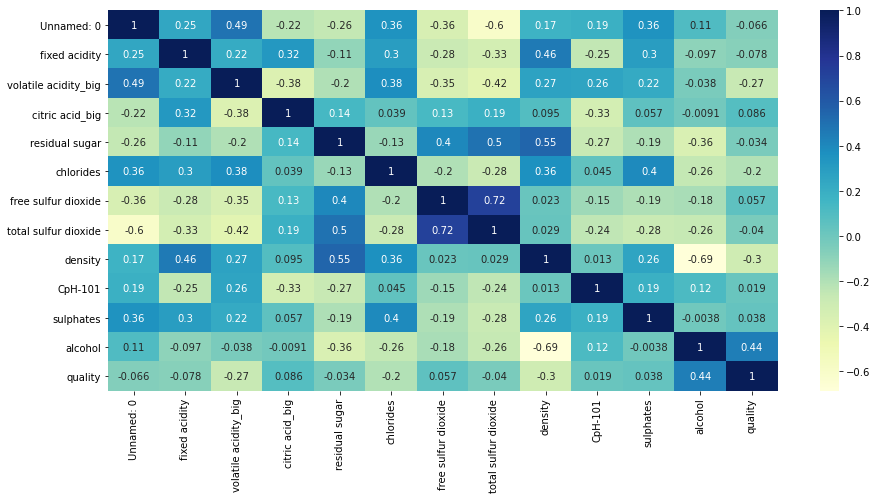

In [16]:
plt.figure(figsize=(15,7))
dataplot = sns.heatmap(data.corr(),cmap = "YlGnBu" , annot = True)
plt.show()

In [17]:
data.head()

,Unnamed: 0,type,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,CpH-101,sulphates,alcohol,quality
0,0,white,7.0,270000,360000,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,white,6.3,300000,340000,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,white,8.1,280000,400000,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,3,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,4,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


___
### Missing handiling 

In [18]:
data.isnull().any()

Unnamed: 0              False
type                    False
fixed acidity            True
volatile acidity_big    False
citric acid_big         False
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
CpH-101                  True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [19]:
#check columns containg missing values
missing = pd.DataFrame({'Missing':data.isnull().sum()})
missing

,Missing
Unnamed: 0,0
type,0
fixed acidity,10
volatile acidity_big,0
citric acid_big,0
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0


- we will fill null value with 

In [20]:
data["fixed acidity"] = data["fixed acidity"].fillna(np.mean(data["fixed acidity"]))
data["residual sugar"]= data["residual sugar"].fillna(np.mean(data["residual sugar"]))
data["chlorides"]     = data["chlorides"].fillna(np.mean(data["chlorides"]))
data["CpH-101"]       = data["CpH-101"].fillna(np.mean(data["CpH-101"]))
data["sulphates"]     = data["sulphates"].fillna(np.mean(data["sulphates"]))

In [21]:
#check columns containg missing values
data.isnull().any()

Unnamed: 0              False
type                    False
fixed acidity           False
volatile acidity_big    False
citric acid_big         False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
CpH-101                 False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

___
### Remove duplicated rows from data 

In [22]:
# Removing duplicate rows from dataset
data = data.drop_duplicates()

In [23]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [24]:
data.head()

,type,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,CpH-101,sulphates,alcohol,quality
0,white,7.0,270000,360000,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,300000,340000,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,280000,400000,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,230000,320000,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


___
### Normalization 
___
* Normalization volatile acidity_big

In [25]:
#volatile acidity_big
va_min=data["volatile acidity_big"].min()
va_max=data["volatile acidity_big"].max()
data["volatile acidity_big"]=((data["volatile acidity_big"]-va_min)/(va_max-va_min))
print(data["volatile acidity_big"])

0       0.170886
1       0.189873
2       0.177215
3       0.145570
4       0.145570
          ...   
6492    0.379747
6493    0.348101
6494    0.322785
6495    0.408228
6496    0.196203
Name: volatile acidity_big, Length: 6465, dtype: float64


* Normalization citric acid_big

In [26]:
#citric acid_big
ca_min=data["citric acid_big"].min()
ca_max=data["citric acid_big"].max()
data["citric acid_big"]=((data["citric acid_big"]-ca_min)/(ca_max-ca_min))
print(data["citric acid_big"])

0       0.216867
1       0.204819
2       0.240964
3       0.192771
4       0.192771
          ...   
6492    0.048193
6493    0.060241
6494    0.078313
6495    0.072289
6496    0.283133
Name: citric acid_big, Length: 6465, dtype: float64


* Normalization free sulfur dioxide

In [27]:
#free sulfur dioxide
fs_min=data["free sulfur dioxide"].min()
fs_max=data["free sulfur dioxide"].max()
data["free sulfur dioxide"]=((data["free sulfur dioxide"]-fs_min)/(fs_max-fs_min))
print(data["free sulfur dioxide"])


0       0.152778
1       0.045139
2       0.100694
3       0.159722
4       0.159722
          ...   
6492    0.107639
6493    0.131944
6494    0.097222
6495    0.107639
6496    0.059028
Name: free sulfur dioxide, Length: 6465, dtype: float64


* Normalization total sulfur dioxide

In [28]:
#total sulfur dioxide
ts_min=data["total sulfur dioxide"].min()
ts_max=data["total sulfur dioxide"].max()
data["total sulfur dioxide"]=((data["total sulfur dioxide"]-ts_min)/(ts_max-ts_min))
print(data["total sulfur dioxide"])

0       0.377880
1       0.290323
2       0.209677
3       0.414747
4       0.414747
          ...   
6492    0.087558
6493    0.103687
6494    0.078341
6495    0.087558
6496    0.082949
Name: total sulfur dioxide, Length: 6465, dtype: float64


### We detect the Outlier and remove it 

-0.01582278481012661 0.4145569620253165
0.024096385542168697 0.3614457831325301
-0.06944444444444445 0.2638888888888889
-0.10599078341013823 0.6129032258064516
-7.6499999999999995 17.549999999999997
0.175 0.855
3.5 7.5
4.450000000000001 9.65


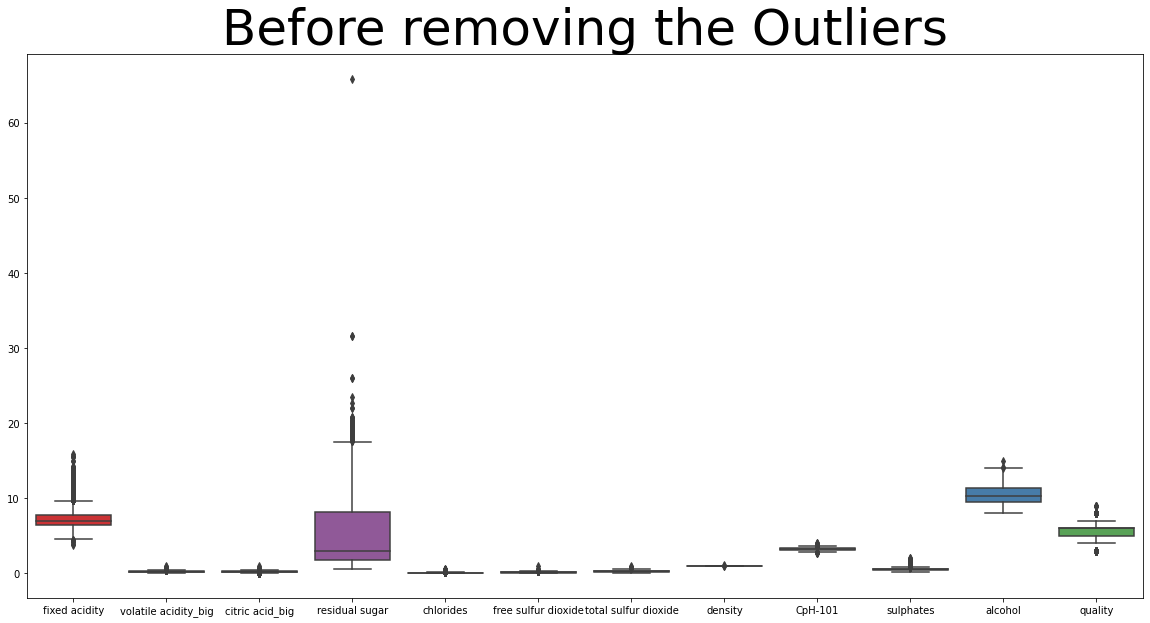

In [29]:
#outliers

plt.figure(figsize = (20,10))
sns.boxplot(data=data,palette="Set1")
plt.title("Before removing the Outliers",size = 50 )
 


#volatile acidity_big
va_q1=data['volatile acidity_big'].quantile(0.25)
va_q3=data["volatile acidity_big"].quantile(0.75)
va_iqr=va_q3-va_q1
va_lower=va_q1-1.5*va_iqr
va_upper=va_q3+1.5*va_iqr
print(va_lower,va_upper)

#citric acid_big
ca_q1=data["citric acid_big"].quantile(0.25)
ca_q3=data["citric acid_big"].quantile(0.75)
ca_iqr=  ca_q3-ca_q1
ca_lower=ca_q1-1.5*ca_iqr
ca_upper=ca_q3+1.5*ca_iqr
print(ca_lower,ca_upper)

#free sulfur dioxide
fsd_q1=data["free sulfur dioxide"].quantile(0.25)
fsd_q3=data["free sulfur dioxide"].quantile(0.75)
fsd_iqr=  fsd_q3-fsd_q1
fsd_lower=fsd_q1-1.5*fsd_iqr
fsd_upper=fsd_q3+1.5*fsd_iqr
print(fsd_lower,fsd_upper)

#total sulfur dioxide
tsd_q1=data["total sulfur dioxide"].quantile(0.25)
tsd_q3=data["total sulfur dioxide"].quantile(0.75)
tsd_iqr=  tsd_q3-tsd_q1
tsd_lower=tsd_q1-1.5*tsd_iqr
tsd_upper=tsd_q3+1.5*tsd_iqr
print(tsd_lower,tsd_upper)

#risidual suger 
rsd_q1 = data["residual sugar"].quantile(0.25)
rsd_q3 = data['residual sugar'].quantile(0.75)
rsd_iqr = rsd_q3 - rsd_q1
rs_lower = rsd_q1-1.5*rsd_iqr
rs_upper = rsd_q3+1.5*rsd_iqr
print(rs_lower,rs_upper)

#sulphates
sul_q1 = data["sulphates"].quantile(0.25)
sul_q3 = data['sulphates'].quantile(0.75)
sul_iqr = sul_q3 - sul_q1
sul_lower = sul_q1-1.5*sul_iqr
sul_upper = sul_q3+1.5*sul_iqr
print(sul_lower,sul_upper)

#quality 
qua_q1 = data["quality"].quantile(0.25)
qua_q3 = data["quality"].quantile(0.75)
qua_iqr = qua_q3 - qua_q1
qua_lower = qua_q1-1.5*qua_iqr
qua_upper = qua_q3+1.5*qua_iqr
print(qua_lower,qua_upper)



#quality 
fix_q1 = data["fixed acidity"].quantile(0.25)
fix_q3 = data["fixed acidity"].quantile(0.75)
fix_iqr = fix_q3 - fix_q1
fix_lower = fix_q1-1.5*fix_iqr
fix_upper = fix_q3+1.5*fix_iqr
print(fix_lower,fix_upper)



In [30]:
newdata=data[(data["volatile acidity_big"]>va_lower)& (data["volatile acidity_big"]<va_upper)
            & (data["citric acid_big"]>ca_lower)& (data["citric acid_big"]<ca_upper)
            & (data["free sulfur dioxide"]>fsd_lower)&(data["free sulfur dioxide"]<fsd_upper)
            & (data["total sulfur dioxide"]>tsd_lower)&(data["total sulfur dioxide"]<tsd_upper)
            & (data["residual sugar"]>rs_lower)&(data["residual sugar"]<rs_upper)
            & (data["sulphates"]>sul_lower)&(data["sulphates"]<sul_upper)
            & (data["quality"]>qua_lower)&(data["quality"]<qua_upper)
            & (data["fixed acidity"]>fix_lower)&(data["fixed acidity"]<fix_upper)]

Text(0.5, 1.0, 'After removeing the Outliers')

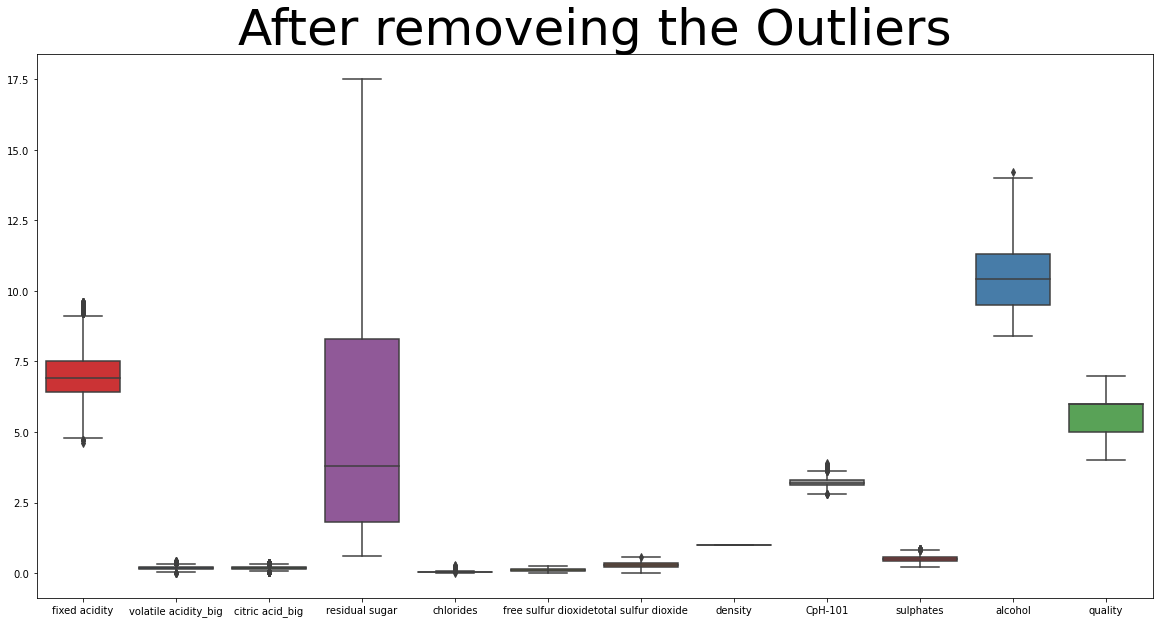

In [31]:
plt.figure(figsize = (20,10))
sns.boxplot(data=newdata,palette="Set1")
plt.title("After removeing the Outliers",size = 50)


Text(0.5, 1.0, 'After removing the Outliers')

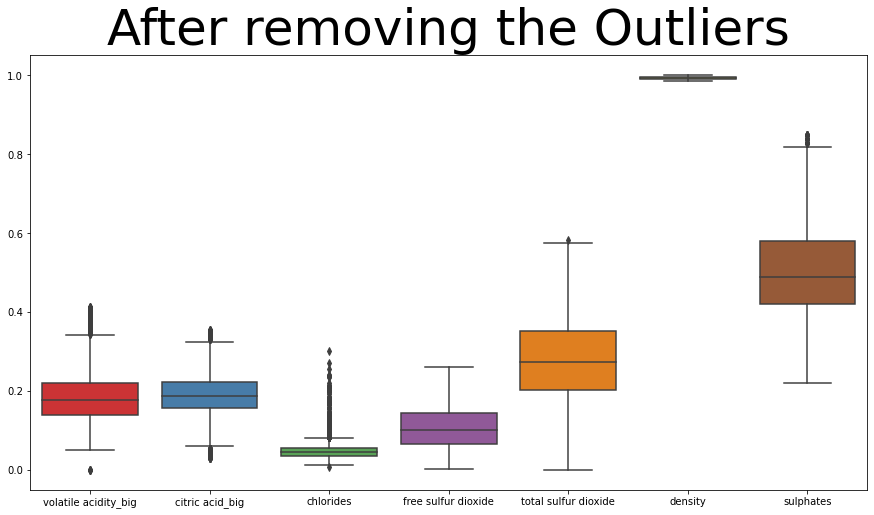

In [32]:
plt.figure(figsize = (15,8))
sns.boxplot(data=newdata[['volatile acidity_big','citric acid_big','chlorides','free sulfur dioxide',
                       'total sulfur dioxide','density','sulphates']],palette="Set1")
plt.title("After removing the Outliers",size = 50 )

Text(0.5, 1.0, 'After removing the Outliers')

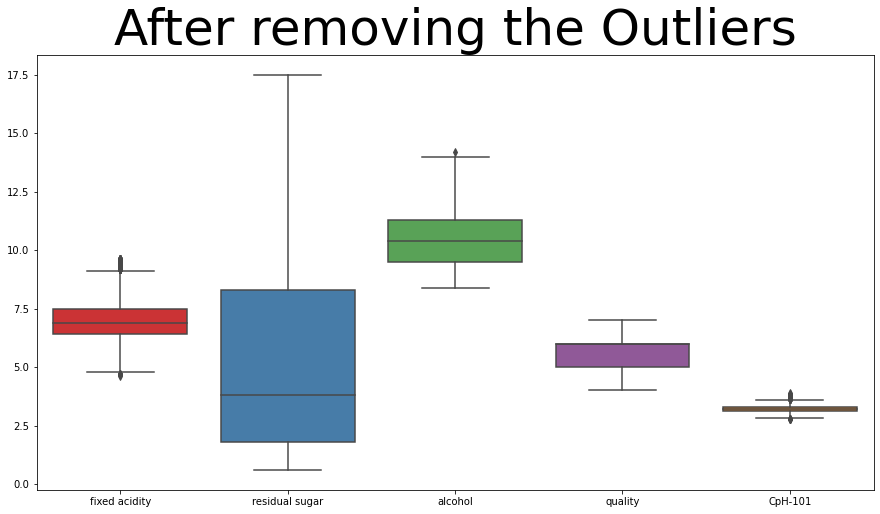

In [33]:
plt.figure(figsize = (15,8))
sns.boxplot(data=newdata[['fixed acidity','residual sugar','alcohol','quality','CpH-101']],palette="Set1")
plt.title("After removing the Outliers",size = 50 )

## The outlires are removed from some columns and still exit in others so we will use another method too

In [34]:
data_mean, data_std = np.mean(data), np.std(data)

In [35]:
cut_off = data_std

In [36]:
lower, upper = data_mean - cut_off, data_mean + cut_off

In [37]:
newdata=newdata[(newdata["volatile acidity_big"]>lower["volatile acidity_big"]) & (newdata["volatile acidity_big"]<upper["volatile acidity_big"])
                & (newdata["citric acid_big"]>lower["citric acid_big"]) & (newdata["citric acid_big"]<upper["citric acid_big"])
                & (newdata["fixed acidity"]>lower["fixed acidity"]) & (newdata["fixed acidity"]<upper["fixed acidity"])
                & (newdata["chlorides"]>lower["chlorides"]) & (newdata["chlorides"]<upper["chlorides"])
                & (newdata["sulphates"]>lower["sulphates"]) & (newdata["sulphates"]<upper["sulphates"])
            ]

Text(0.5, 1.0, 'After removing the Outliers for 2nd time')

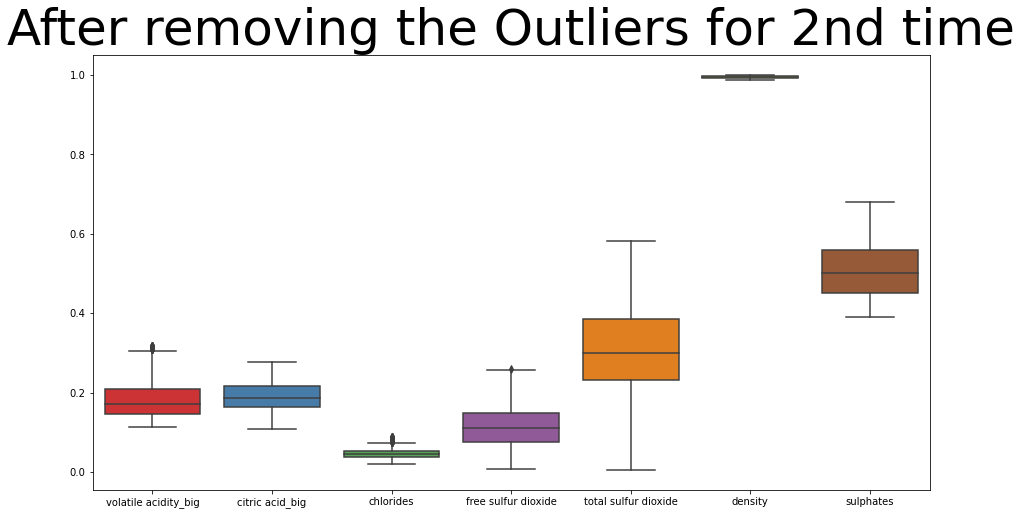

In [38]:
plt.figure(figsize = (15,8))
sns.boxplot(data=newdata[['volatile acidity_big','citric acid_big','chlorides','free sulfur dioxide',
                       'total sulfur dioxide','density','sulphates']],palette="Set1")
plt.title("After removing the Outliers for 2nd time",size = 50 )

Text(0.5, 1.0, 'After removing the Outliers for 2nd time')

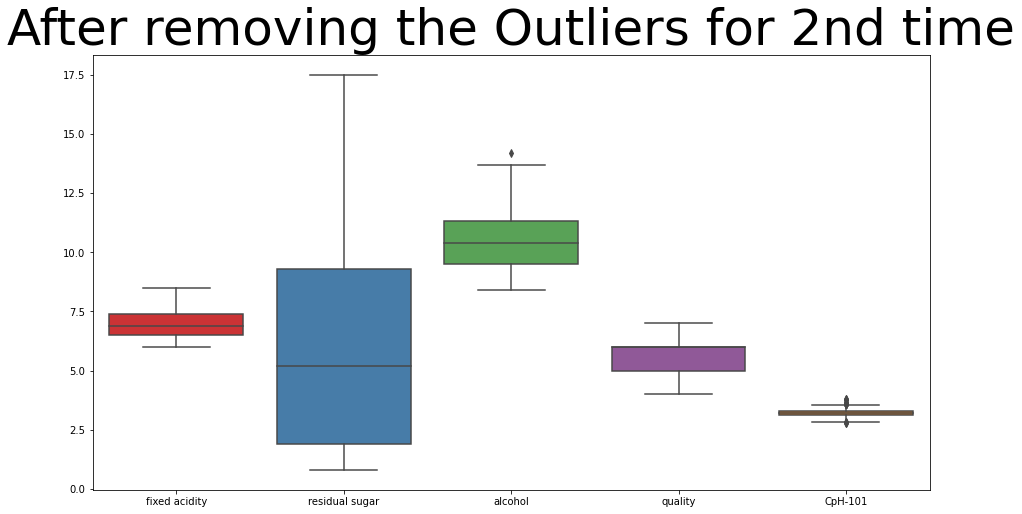

In [39]:
plt.figure(figsize = (15,8))
sns.boxplot(data=newdata[['fixed acidity','residual sugar','alcohol','quality','CpH-101']],palette="Set1")
plt.title("After removing the Outliers for 2nd time",size = 50 )

### 3)  Apply discretization on numeric attributes as possible 

(array([ 24.,  93., 342., 668., 510., 363., 130.,  34.,   2.,   4.]),
 array([2.79 , 2.892, 2.994, 3.096, 3.198, 3.3  , 3.402, 3.504, 3.606,
        3.708, 3.81 ]),
 <BarContainer object of 10 artists>)

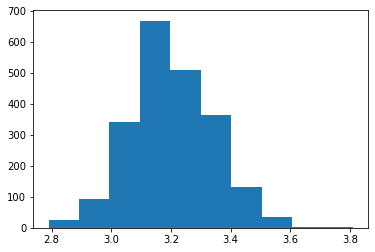

In [40]:
plt.hist(newdata['CpH-101'])

In [41]:
newdata['CpH-101'].unique()

array([3.3       , 3.26      , 3.19      , 3.22      , 2.99      ,
       3.18      , 3.12      , 3.42      , 3.25      , 3.45      ,
       3.38      , 3.2       , 3.13      , 3.24      , 3.16      ,
       3.27      , 3.36      , 3.35      , 3.34      , 3.09      ,
       3.15      , 3.33      , 3.04      , 3.        , 3.31      ,
       3.01      , 3.14      , 3.21      , 2.89      , 3.29      ,
       3.28      , 3.08      , 3.03      , 3.1       , 3.32      ,
       3.39      , 3.48      , 3.05      , 2.98      , 3.44      ,
       3.37      , 2.96      , 3.23      , 3.17      , 3.11      ,
       3.49      , 3.46      , 3.06      , 3.21836921, 3.41      ,
       2.95      , 3.47      , 3.64      , 3.07      , 3.02      ,
       3.5       , 2.94      , 3.4       , 3.58      , 3.51      ,
       2.97      , 3.52      , 3.81      , 2.85      , 2.92      ,
       3.77      , 3.74      , 3.56      , 3.6       , 3.43      ,
       2.93      , 3.57      , 3.54      , 3.53      , 3.59   

#### The values are all measured and the number of unique values are large so they are continous
#### we are using descretization to convert them into discrete

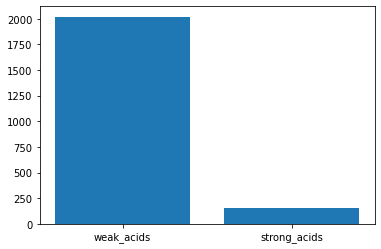

In [42]:
newdata['pH_acidity_discretized'] = pd.cut( x = newdata['CpH-101'] ,bins = [0,3,7]  , labels = ['strong_acids' , 'weak_acids'])

def draw_barplot(x):
    s = x.value_counts()
    plt.bar(s.index,s.values)
    
draw_barplot(newdata['pH_acidity_discretized'])

In [43]:
newdata

,type,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,CpH-101,sulphates,alcohol,quality,pH_acidity_discretized
1,white,6.3,0.189873,0.204819,1.6,0.049,0.045139,0.290323,0.99400,3.30,0.49,9.50,6,weak_acids
2,white,8.1,0.177215,0.240964,6.9,0.050,0.100694,0.209677,0.99510,3.26,0.44,10.10,6,weak_acids
3,white,7.2,0.145570,0.192771,8.5,0.058,0.159722,0.414747,0.99560,3.19,0.40,9.90,6,weak_acids
4,white,7.2,0.145570,0.192771,8.5,0.058,0.159722,0.414747,0.99560,3.19,0.40,9.90,6,weak_acids
5,white,8.1,0.177215,0.240964,6.9,0.050,0.100694,0.209677,0.99510,3.26,0.44,10.10,6,weak_acids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,red,6.9,0.303797,0.120482,1.9,0.082,0.027778,0.039171,0.99585,3.39,0.43,9.05,4,weak_acids
6421,red,6.8,0.303797,0.150602,2.0,0.076,0.097222,0.126728,0.99530,3.34,0.60,10.40,5,weak_acids
6431,red,8.0,0.246835,0.180723,1.9,0.074,0.107639,0.179724,0.99717,3.39,0.61,9.00,5,weak_acids
6478,red,7.4,0.221519,0.198795,2.4,0.068,0.027778,0.046083,0.99470,3.36,0.60,11.90,6,weak_acids


In [44]:
# remove CpH-101 bec. we applied decretiztion on it and store values in new column
newdata.drop(columns = ['CpH-101'],axis=1,inplace=True)

In [45]:
newdata['pH_acidity_discretized'] = data.quality.apply(lambda q: 1 if q == 'weak_acids' else 0)

In [46]:
newdata

,type,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,pH_acidity_discretized
1,white,6.3,0.189873,0.204819,1.6,0.049,0.045139,0.290323,0.99400,0.49,9.50,6,0
2,white,8.1,0.177215,0.240964,6.9,0.050,0.100694,0.209677,0.99510,0.44,10.10,6,0
3,white,7.2,0.145570,0.192771,8.5,0.058,0.159722,0.414747,0.99560,0.40,9.90,6,0
4,white,7.2,0.145570,0.192771,8.5,0.058,0.159722,0.414747,0.99560,0.40,9.90,6,0
5,white,8.1,0.177215,0.240964,6.9,0.050,0.100694,0.209677,0.99510,0.44,10.10,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,red,6.9,0.303797,0.120482,1.9,0.082,0.027778,0.039171,0.99585,0.43,9.05,4,0
6421,red,6.8,0.303797,0.150602,2.0,0.076,0.097222,0.126728,0.99530,0.60,10.40,5,0
6431,red,8.0,0.246835,0.180723,1.9,0.074,0.107639,0.179724,0.99717,0.61,9.00,5,0
6478,red,7.4,0.221519,0.198795,2.4,0.068,0.027778,0.046083,0.99470,0.60,11.90,6,0


# Part 2

## Supervised Learning Algorithms

## Decision tree

In [47]:
dataset1 = newdata

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

* **assigning the type class label to variable y and the other features to variable x**

In [49]:
x=dataset1.drop(["type"],axis=1)
y=dataset1["type"]

* **_splitting the data set into into 2 sets one for training and other for testing using train_test_split where the size of training set is 80% and that of test set is 20%_**

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

* **`DecisionTreeClassifier()`: is a class capable of performing classification on a dataset**
* **`max_depth` : parameter determines the maximum depth the tree can be**
* **`ccp_ahpha` : parameter Compute the pruning path during Minimal Cost-Complexity Pruning**
* **`fit()`: takes the training data as arguments and return Fitted estimator**

In [51]:
clf=DecisionTreeClassifier(max_depth=5,ccp_alpha=0.001)
clf=clf.fit(x_train,y_train)

* **Predict class for X where it returns the predicted class for each sample in X parameter For a classification model**

In [52]:
predictions=clf.predict(x_test)

* **`accuracy_score()` function to calculate the accuracy of the model where it takes 2 arguments test data set and the predicted label as returned by a classifier**

In [53]:
accuracy_score(y_test,predictions)

0.9953917050691244

* **classification_report() function that Build a text report showing the main classificationmetrics where it takes 2 arguments test data set and the predicted label as returned bya classifier, and it returns Text summary of the precision, recall, F1 score support foreach class**

In [54]:
cf_report = classification_report(y_test,predictions)
print(cf_report)

              precision    recall  f1-score   support

         red       0.96      0.96      0.96        25
       white       1.00      1.00      1.00       409

    accuracy                           1.00       434
   macro avg       0.98      0.98      0.98       434
weighted avg       1.00      1.00      1.00       434



* **`confusion_matrix` : to evaluate the accuracy of a classification by knowing the the countof true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and falsepositives is C0,1 and it is visualized using heat map function**

<AxesSubplot:>

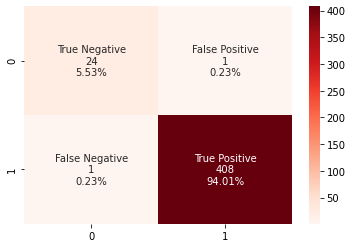

In [55]:
cf_matrix=confusion_matrix(y_test,predictions)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

* **`plot_tree`: Plot a decision tree, but The visualization is fit automatically to the size of the axis. Use the dpi arguments of plt.figure to control the size of the rendering**

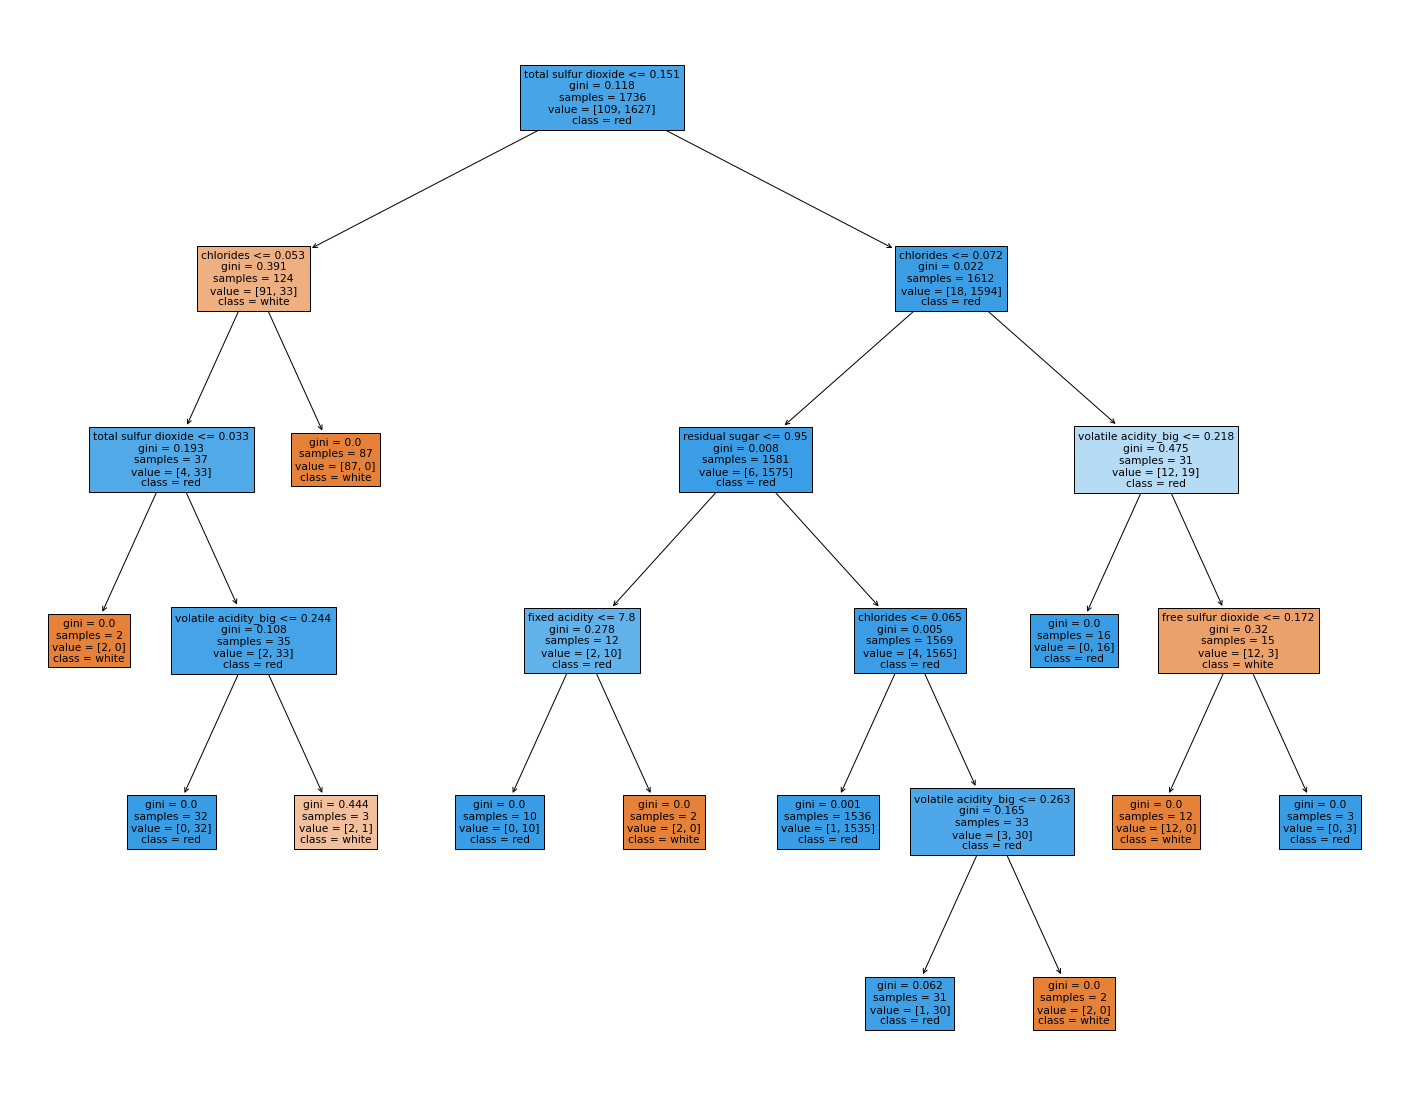

In [56]:
fig = plt.figure(figsize=(25,20))
plot=tree.plot_tree(clf,feature_names=["fixed acidity","volatile acidity_big","citric acid_big","residual sugar","chlorides",
                                       "free sulfur dioxide","total sulfur dioxide","density","CpH-101","sulphates","alcohol",
                                       "quality","pH_acidity_discretized"],class_names=["white","red"],filled=True)

In [57]:
#fig.savefig("tree4.png")

## K Nearest Neighbors

In [58]:
dataset2 = newdata

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
#knn (target is type)
#features
x2=dataset2.drop(["type"],axis=1)
#target
y2=dataset2["type"]
# Split dataset into training set and test set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(x_train2, y_train2)

KNeighborsClassifier()

In [61]:
knn_predictions = knn.predict(x_test2)

* **`Accuracy_score function` :  return the accuracy of your model based on the test data that you entered It takes two parameters the actual class for the training data and the prediction that the model returned it**

In [62]:
accuracy_score(y_test2,knn_predictions)

0.9470046082949308

In [63]:
print(knn_predictions)

['white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'red' 'white' 'white' 'white' 'white' 'white' 'white' 'white' 'white'
 'white' 'white' 'red' 'white' 'white' 'white' 'white

* **`confusion_matrix`: to evaluate the accuracy of a classification by knowing the the count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1 and it is visualized using heat map function**


<AxesSubplot:>

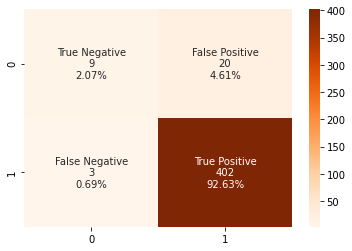

In [64]:
cf_matrix2=confusion_matrix(y_test2,knn_predictions)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Oranges')

In [65]:
cf_report2 = classification_report(y_test2,knn_predictions)
print(cf_report2)

              precision    recall  f1-score   support

         red       0.75      0.31      0.44        29
       white       0.95      0.99      0.97       405

    accuracy                           0.95       434
   macro avg       0.85      0.65      0.71       434
weighted avg       0.94      0.95      0.94       434



# Naive Bayes Algorithm
___
**we name the newdata => dataset to not confiusion with other data**

In [66]:
dataset3 = newdata

In [67]:
dataset3.head()

,type,fixed acidity,volatile acidity_big,citric acid_big,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,pH_acidity_discretized
1,white,6.3,0.189873,0.204819,1.6,0.049,0.045139,0.290323,0.9940,0.49,9.5,6,0
2,white,8.1,0.177215,0.240964,6.9,0.050,0.100694,0.209677,0.9951,0.44,10.1,6,0
3,white,7.2,0.145570,0.192771,8.5,0.058,0.159722,0.414747,0.9956,0.40,9.9,6,0
4,white,7.2,0.145570,0.192771,8.5,0.058,0.159722,0.414747,0.9956,0.40,9.9,6,0
5,white,8.1,0.177215,0.240964,6.9,0.050,0.100694,0.209677,0.9951,0.44,10.1,6,0


* **w for white Dataframe**

* **r for Red   Dataframe** 

In [68]:
w = dataset3[dataset3['type'] == 'white']
r = dataset3[dataset3['type'] == 'red']

* **we shall now examine white and red wine by examining their chlorides and citric acid_big**

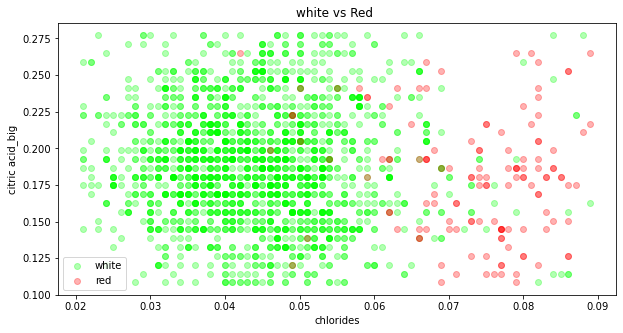

In [69]:
fig = plt.figure(figsize=(10,5))
plt.title("white vs Red ")
plt.xlabel("chlorides")
plt.ylabel("citric acid_big")
plt.scatter(w['chlorides'], w['citric acid_big'], color = "lime", label = "white", alpha = 0.3)
plt.scatter(r['chlorides'], r['citric acid_big'], color = "red", label = "red", alpha = 0.3)
plt.legend()


`Preprocessing`: **Now we white wine will be assinged a value of '1' and red wine will be assinged to value of '0'**

In [70]:
dataset3['type'] = [1 if i=='white' else 0 for i in dataset3['type']]

**Now we divided our dataframe into x and y components . The x variable includes all independent predictor factors, wheras the y variable provides the wine prediction**
* **we drop all column that we don't need in naive bayes so we drop type

In [71]:
x3 = dataset3.drop(['type'] , axis = 1)
y3 = dataset3['type'].values

`Test Train Split`:**After that, we’ll use the train test split module from the sklearn package to divide the dataset into training and testing sections.**

In [72]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.2)

`Sklearn Gaussian Naive Bayes Model` : **Now we’ll import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. To fit the model, we may pass x_train and y_train.**

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train3, y_train3)

GaussianNB()

In [74]:
naive_prediction=nb.predict(x_test3)

In [75]:
naive_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

`Accuracy` : **The following accuracy score reflects how successfully our Sklearn Gaussian Naive Bayes model predicted cancer using the test data**

In [76]:
print(accuracy_score(y_test3,naive_prediction))

0.9930875576036866


<AxesSubplot:>

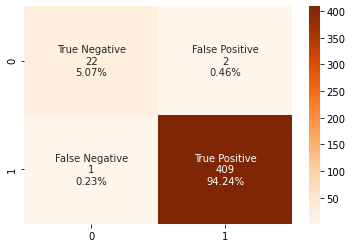

In [77]:
cf3 = confusion_matrix(y_test3,naive_prediction)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cf3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf3.flatten()/np.sum(cf3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf3, annot=labels, fmt='', cmap='Oranges')

In [78]:
cf_report3 = classification_report(y_test3,naive_prediction)
print(cf_report3)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       1.00      1.00      1.00       410

    accuracy                           0.99       434
   macro avg       0.98      0.96      0.97       434
weighted avg       0.99      0.99      0.99       434



## Unsupervised Learning Algorithm

# K means

___
___
# `K means Algorithm`
* **k-means clustering is an unsupervised**
* **_steps_**
    1. Choose the k number of clusters and determine their centroids
    2. Assign each data point to its nearest centroid using distance measures
    3. Recalculate the new centroids and again assign each data point to its nearest centroid
    4. Repeat step 3 and 4 until centroids do not change or no change in criterion function (J) 

In [79]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
%matplotlib inline

**we read the data and print the first five rows**

In [80]:
df = pd.read_csv(r"C:\Users\free bytes\Downloads\SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,loudness,tempo,energy
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,-1.828,166.969,0.910
1,Movie,Martin & les f�es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,-5.559,174.003,0.737
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,-13.879,99.488,0.131
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,-12.178,171.758,0.326
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,-21.150,140.576,0.225


### Remove correlated attributes >0.8 
* __With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! Let's check the confusion matrix for this:__

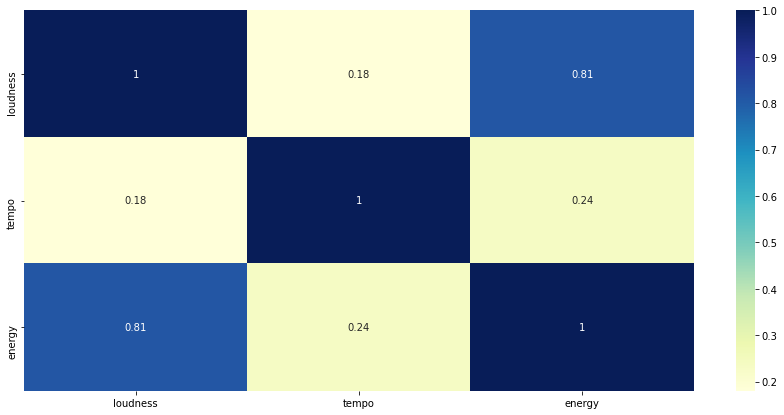

In [81]:
plt.figure(figsize=(15,7))
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu" , annot = True)
plt.show()

* **we drop the energy because the correlated value eqult to 81%** 

In [82]:
df.drop(columns=['energy'], inplace = True)

* **we drop the energy because the correlated value eqult to 81%** 

In [83]:
df

,genre,artist_name,track_name,track_id,loudness,tempo
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,-1.828,166.969
1,Movie,Martin & les f�es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,-5.559,174.003
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,-13.879,99.488
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,-12.178,171.758
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,-21.150,140.576
...,...,...,...,...,...,...
2994,Alternative,Sidewalk Prophets,Come To the Table,2gdSplXjHbjMMfLcwl3Nku,-6.098,81.037
2995,Alternative,Thousand Foot Krutch,Untraveled Road,2IIOBRgHTsmEMYzMU0zHws,-6.341,125.026
2996,Alternative,Kiana Led�,Wicked Games,0TYhf0MgEj4YJaKwo5c4Km,-7.042,72.973
2997,Alternative,Pantera,I'm Broken,2M5WTwqnkyz7bW6P1CiD6q,-6.352,147.385


* **we drop the energy because the correlated value eqult to 81%** 

In [84]:
df.drop(columns=['track_name','genre','artist_name'], inplace = True)

### Missing handling to the null value 

In [85]:
df.isna().any()

track_id    False
loudness     True
tempo        True
dtype: bool

* **we fill the null value in loudness and tempo with their mean value**

In [86]:
df.loudness= df.loudness.fillna(df.loudness.mean())
df.tempo= df.tempo.fillna(df.tempo.mean())
df.head()

,track_id,loudness,tempo
0,0BRjO6ga9RKCKjfDqeFgWV,-1.828,166.969
1,0BjC1NfoEOOusryehmNudP,-5.559,174.003
2,0CoSDzoNIKCRs124s9uTVy,-13.879,99.488
3,0Gc6TVm52BwZD07Ki6tIvf,-12.178,171.758
4,0IuslXpMROHdEPvSl1fTQK,-21.150,140.576


* **check our method now no column has null value**

In [87]:
df.isna().any()

track_id    False
loudness    False
tempo       False
dtype: bool

### We detect the Outlier and remove it 

Text(0.5, 1.0, 'Before removing the Outliers')

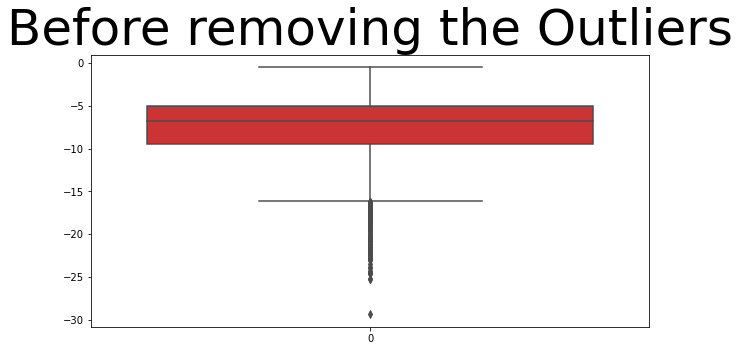

In [88]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df['loudness'],palette="Set1")
plt.title("Before removing the Outliers",size = 50 )

<AxesSubplot:>

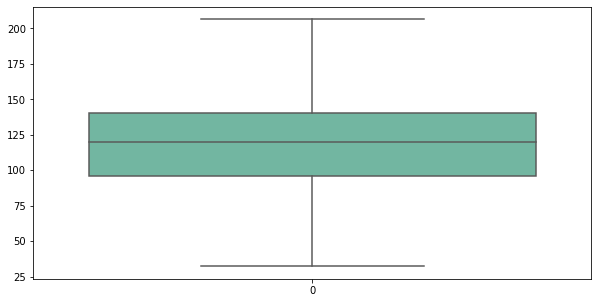

In [89]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df['tempo'],palette="Set2")

In [90]:
#qloudness
lou_q1 = df["loudness"].quantile(0.25)
lou_q3 = df["loudness"].quantile(0.75)
lou_iqr = lou_q3 - lou_q1
lou_lower = lou_q1-1.5*lou_iqr
lou_upper = lou_q3+1.5*lou_iqr
print(lou_lower,lou_upper)

-16.171749999999996 1.6102499999999988


In [91]:
newdata2=df[(df["loudness"]>lou_lower) & (df["loudness"]<lou_upper)]

Text(0.5, 1.0, 'After removing the Outliers')

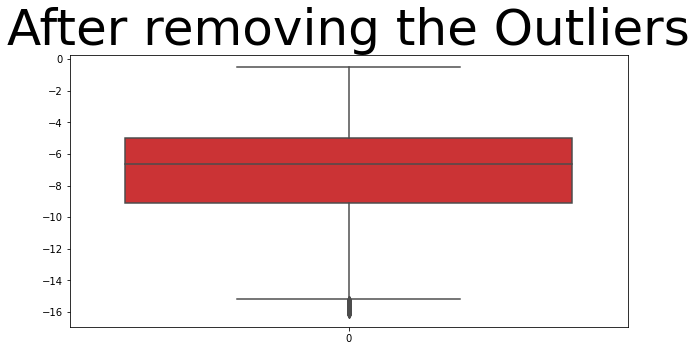

In [92]:
plt.figure(figsize = (10,5))
sns.boxplot(data=newdata2['loudness'],palette="Set1")
plt.title("After removing the Outliers",size = 50 )

In [93]:
newdata2

,track_id,loudness,tempo
0,0BRjO6ga9RKCKjfDqeFgWV,-1.828,166.969
1,0BjC1NfoEOOusryehmNudP,-5.559,174.003
2,0CoSDzoNIKCRs124s9uTVy,-13.879,99.488
3,0Gc6TVm52BwZD07Ki6tIvf,-12.178,171.758
5,0Mf1jKa8eNAf1a4PwTbizj,-14.970,87.479
...,...,...,...
2994,2gdSplXjHbjMMfLcwl3Nku,-6.098,81.037
2995,2IIOBRgHTsmEMYzMU0zHws,-6.341,125.026
2996,0TYhf0MgEj4YJaKwo5c4Km,-7.042,72.973
2997,2M5WTwqnkyz7bW6P1CiD6q,-6.352,147.385


*  `MinMaxScaler() function` : **Transform features by scaling each feature to a given range.This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.**

In [94]:
scaler = MinMaxScaler()

scaler.fit(df[['tempo']])
df['tempo'] = scaler.transform(df[['tempo']])

scaler.fit(df[['loudness']])
df['loudness'] = scaler.transform(df[['loudness']])

Text(0, 0.5, 'loudness')

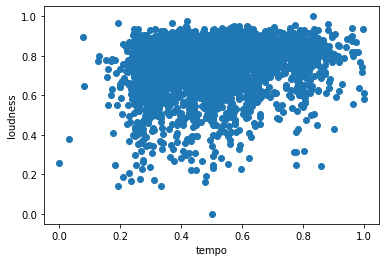

In [95]:
plt.scatter(df.tempo,df['loudness'])
plt.xlabel('tempo')
plt.ylabel('loudness')

*  `MinMaxScaler() function` : **Transform features by scaling each feature to a given range.This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.**

In [96]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['tempo','loudness']])
y_predicted

array([2, 2, 0, ..., 1, 2, 1])

In [97]:
df['cluster']=y_predicted
df.head()

,track_id,loudness,tempo,cluster
0,0BRjO6ga9RKCKjfDqeFgWV,0.954692,0.773748,2
1,0BjC1NfoEOOusryehmNudP,0.825354,0.814145,2
2,0CoSDzoNIKCRs124s9uTVy,0.536936,0.386193,0
3,0Gc6TVm52BwZD07Ki6tIvf,0.595903,0.801252,2
4,0IuslXpMROHdEPvSl1fTQK,0.284882,0.622169,0


* **this is our centroids**

In [98]:
km.cluster_centers_

array([[0.42357502, 0.52072444],
       [0.38764322, 0.79842844],
       [0.68198617, 0.79275898]])

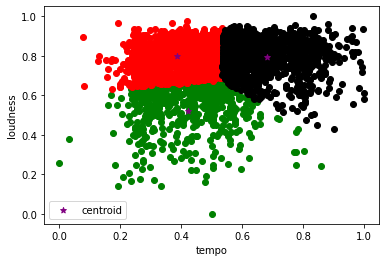

In [99]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.tempo,df1['loudness'],color='green')
plt.scatter(df2.tempo,df2['loudness'],color='red')
plt.scatter(df3.tempo,df3['loudness'],color='black')
#from centroid 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('tempo')
plt.ylabel('loudness')
plt.legend()